In [115]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

def phred33ToQ(qual):
    return ord(qual)

def createHist(qualities):
    hist = [0]*100
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [4]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [5]:
file = "/Users/christinewei/Downloads/lambda_virus.fa"

In [6]:
virus_genome = readGenome(file)

In [7]:
virus_genome

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

## naive(p, t)
### Purpose:
Find all occurrences of a pattern p in a text t.

### Parameters:

p: The pattern to search for (string).
t: The text in which to search for the pattern (string).
Returns:

### occurrences: A list of starting indices where the pattern p matches the text t.

In [65]:
occurrences = naive('AGTCGA', virus_genome)

In [66]:
# These are the locations (indices) that pattern occur
occurrences

[18005, 23320, 33657, 44806]

In [67]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 18005


In [68]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 4


In [69]:
reverse_occurrences = naive(reverseComplement("AGTCGA"), virus_genome)

In [70]:
# These are the locations (indices) that pattern's reverse complement occur
reverse_occurrences

[450, 1908, 2472, 41927, 45369]

In [71]:
print('offset of reverse occurrence: %d' % min(reverse_occurrences))

offset of reverse occurrence: 450


In [72]:
print('# reverse occurrences: %d' % len(reverse_occurrences))

# reverse occurrences: 5


In [81]:
# allows up to 2 mismatches per occurrence
def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatch = 0  # Initialize mismatch counter here
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i + j] != p[j]:  # compare characters
                mismatch += 1
                if mismatch > 2:  # allow up to 2 mismatches
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched within allowed mismatches; record
    return occurrences


In [86]:
occurrences_2mm = naive_2mm('AGGAGGTT', virus_genome)

In [87]:
# These are the locations (indices) that pattern occur
occurrences_2mm

[49,
 282,
 299,
 302,
 380,
 1560,
 1650,
 2235,
 2277,
 2400,
 2562,
 2565,
 2729,
 2823,
 3160,
 3181,
 3946,
 4210,
 4294,
 4309,
 4405,
 4580,
 5069,
 5159,
 5189,
 5231,
 5331,
 5519,
 5737,
 5882,
 5993,
 5996,
 6011,
 6312,
 6522,
 6585,
 6606,
 7316,
 7394,
 7819,
 7904,
 7966,
 7998,
 8534,
 8648,
 8946,
 9339,
 9354,
 9530,
 9842,
 9966,
 10041,
 10250,
 10416,
 10445,
 10484,
 10527,
 10874,
 11193,
 11292,
 11505,
 11568,
 11655,
 11745,
 11838,
 12078,
 12180,
 12222,
 12697,
 12745,
 12819,
 12880,
 12935,
 13011,
 13087,
 13256,
 13415,
 13526,
 13813,
 14259,
 15385,
 15473,
 16192,
 17101,
 17437,
 17755,
 17936,
 17989,
 18016,
 18040,
 18727,
 18853,
 18911,
 19232,
 19263,
 19310,
 19833,
 19929,
 19932,
 19947,
 19980,
 20793,
 20802,
 21305,
 21528,
 21627,
 21684,
 22414,
 22660,
 22670,
 22787,
 23326,
 24063,
 24145,
 24409,
 24595,
 24681,
 25120,
 25139,
 25210,
 25381,
 25384,
 25648,
 25664,
 25773,
 25987,
 26196,
 26208,
 26576,
 26587,
 26653,
 26736,
 

In [88]:
print('offset of leftmost occurrence: %d' % min(occurrences_2mm))

offset of leftmost occurrence: 49


In [89]:
print('# occurrences: %d' % len(occurrences_2mm))

# occurrences: 215


In [92]:
file = "/Users/christinewei/Downloads/ERR037900_1.first1000.fastq"

In [94]:
sequences, qualities = readFastq(file)

In [95]:
qualities

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################',
 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHHHIHIHHHGH:#@@@@9@C@EEGCGGFIFFF9FCAF?EEE4B8>>',
 "HHHHHHHHHHHHHHHHHHHHHHIFHFEGGFHHHHHHGHHHHGHHHHHFHAFGHEHHIHHGBCCDC,#55564565CE:BB44+'5/36,(<<BC<DDBCE",
 'HHFHHDHHHHDDGGGDHDHHHHHGHHHHHHHDHHECHHH8GGDEEHHHHEH?3HG<=4>555624/#5/55/555DADA#####################',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIIFIHEIIGFI@#==?46560GAAEDGGDGCA8CCB=@########',
 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [116]:
hist = createHist(qualities)

In [117]:
hist

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17723,
 0,
 2,
 11,
 11,
 28,
 23,
 55,
 100,
 111,
 86,
 174,
 185,
 272,
 317,
 259,
 390,
 1523,
 2782,
 762,
 286,
 413,
 403,
 538,
 351,
 694,
 971,
 777,
 1024,
 1449,
 1341,
 1312,
 1916,
 2233,
 3025,
 4043,
 6640,
 45696,
 2074,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

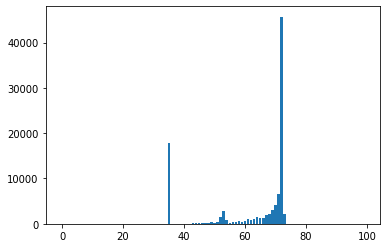

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(hist)), hist)
plt.show()

In [119]:
hist.index(17723)

35

### **X-Axis (Cycle)**: 
Represents the cycle number in the sequencing run.
### **Y-Axis (Average Quality Score)** : 
Represents the average quality score for each cycle.
### Plot: 
A drop in the line plot indicates a cycle with lower quality scores, pointing to potential issues in that cycle.

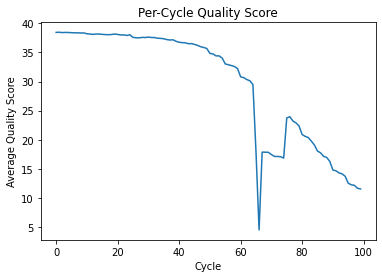

In [120]:
import matplotlib.pyplot as plt

def phred33ToQ(qual):
    return ord(qual) - 33

def createCycleQualityHist(qualities):
    max_length = max(len(qual) for qual in qualities)
    hist = [0] * max_length
    count = [0] * max_length
    
    for qual in qualities:
        for i, phred in enumerate(qual):
            q = phred33ToQ(phred)
            hist[i] += q
            count[i] += 1
            
    avg_hist = [hist[i] / count[i] if count[i] != 0 else 0 for i in range(max_length)]
    return avg_hist

# Example usage with dummy data


avg_hist = createCycleQualityHist(qualities)

plt.plot(range(len(avg_hist)), avg_hist)
plt.xlabel('Cycle')
plt.ylabel('Average Quality Score')
plt.title('Per-Cycle Quality Score')
plt.show()
